In [32]:
#多个
import re
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 13  # 替换成你想要的字体大小
# 定义数据
# 定义数据
eval_methods = ['kw_matching', 'harmbench','llamaguard']
models=['llama2','vicuna']
folders = ['_without_cosdecay_and_lasthiddenstate','_with_cosdecay_and_lasthiddenstate',\
    '_without_cosdecay_and_mean_sentemb','_with_cosdecay_and_mean_sentemb']

withoutcos={}

# 创建2x2子图
# 使用for循环绘制每个子图
for i, eval_method in enumerate(eval_methods):
    for j, model in enumerate(models):
        newmodel=model
        neweval_method=eval_method
        if model=='llama2':
            newmodel='Llama-2'
        if eval_method=='kw_matching':
            neweval_method='keyword matching'
        elif eval_method=='harmbench':
            neweval_method='HarmBench'
        elif eval_method=='llamaguard':
            neweval_method='Llama Guard'
        withoutcos[neweval_method+' on '+newmodel]=[]
        for folder in folders:
            path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
            rounds=os.listdir(path)
            dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
            for dirpath in dirpaths:
                for path in os.listdir(dirpath):
                    if path.endswith('log') and path.startswith('eval'):
                        al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                        if al==0:
                            with open(os.path.join(dirpath,path),'r') as alpha:
                                content=alpha.read()
                                res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                                res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                                prev=res[0][1]
                                for k in range(len(res)):
                                    if res[k][2]==0:
                                        res[k][1]=prev
                                    prev=res[k][1]
                                withoutcos[neweval_method+' on '+newmodel].append([k[1] for k in res])
withoutcos

{'keyword matching on Llama-2': [[0, 7, 11, 17, 18, 40, 32, 41, 40, 40, 40],
  [0, 1, 2, 48, 35, 55, 55, 55, 55, 55, 55],
  [0, 2, 4, 5, 4, 4, 4, 4, 5, 5, 5],
  [0, 19, 24, 33, 33, 29, 32, 32, 32, 32, 32],
  [0, 0, 5, 13, 34, 48, 37, 43, 37, 49, 49],
  [0, 1, 14, 13, 19, 26, 40, 40, 57, 57, 54],
  [0, 1, 4, 12, 23, 32, 32, 32, 32, 32, 32],
  [0, 1, 10, 10, 15, 15, 14, 14, 14, 14, 17],
  [0, 1, 1, 1, 16, 7, 7, 24, 10, 9, 7],
  [0, 13, 51, 33, 26, 29, 20, 26, 26, 26, 22],
  [0, 2, 18, 8, 8, 14, 9, 12, 14, 14, 14],
  [0, 1, 1, 1, 1, 3, 10, 2, 2, 2, 2]],
 'keyword matching on vicuna': [[0, 61, 64, 60, 56, 46, 50, 50, 50, 50, 50],
  [0, 71, 65, 59, 59, 59, 59, 59, 59, 59, 76],
  [0, 35, 45, 41, 42, 42, 42, 36, 47, 47, 47],
  [0, 28, 48, 62, 62, 43, 50, 42, 55, 55, 55],
  [0, 44, 56, 40, 44, 45, 38, 38, 53, 61, 61],
  [0, 39, 31, 47, 67, 64, 62, 62, 62, 62, 50],
  [0, 31, 33, 49, 49, 35, 35, 34, 34, 34, 36],
  [0, 16, 26, 39, 37, 28, 26, 26, 26, 26, 26],
  [0, 48, 51, 54, 43, 50, 50, 43, 46,

In [33]:

# 定义数据
eval_methods = ['kw_matching', 'harmbench','llamaguard']
models=['llama2','vicuna']
folders = ['_with_cosdecay']

withcos={}

# 创建2x2子图
# 使用for循环绘制每个子图
for i, eval_method in enumerate(eval_methods):
    for j, model in enumerate(models):
        newmodel=model
        neweval_method=eval_method
        if model=='llama2':
            newmodel='Llama-2'
        if eval_method=='kw_matching':
            neweval_method='keyword matching'
        elif eval_method=='harmbench':
            neweval_method='HarmBench'
        elif eval_method=='llamaguard':
            neweval_method='Llama Guard'
        withcos[neweval_method+' on '+newmodel]=[]
        for folder in folders:
            path='/home/yjj/llm-attacks/experiments/'+model+folder+'/'
            rounds=os.listdir(path)
            dirpaths=[path + round_+'/'+'eval_scripts/' +eval_method for round_ in rounds]
            for dirpath in dirpaths:
                for path in os.listdir(dirpath):
                    if path.endswith('log') and path.startswith('eval'):
                        al=int(re.findall(r'(?:alpha|search)_(\d+)',path)[0])
                        if al==0:
                            with open(os.path.join(dirpath,path),'r') as alpha:
                                content=alpha.read()
                                res=re.findall(r'Test Step (\d+)\/\d+ \| Jailbroken (\d+)\/(\d+)',content)
                                res=[[0,0,0]]+list(map(lambda x:[int(x[0]),int(x[1]),int(x[2])],res))
                                prev=res[0][1]
                                for k in range(len(res)):
                                    if res[k][2]==0:
                                        res[k][1]=prev
                                    prev=res[k][1]
                                withcos[neweval_method+' on '+newmodel].append([k[1] for k in res])

In [34]:
for k,v in withcos.items():
    withcos[k]=np.array(v)
for k,v in withoutcos.items():
    withoutcos[k]=np.array(v)

In [35]:
withcos.keys(),withoutcos.keys()

(dict_keys(['keyword matching on Llama-2', 'keyword matching on vicuna', 'HarmBench on Llama-2', 'HarmBench on vicuna', 'Llama Guard on Llama-2', 'Llama Guard on vicuna']),
 dict_keys(['keyword matching on Llama-2', 'keyword matching on vicuna', 'HarmBench on Llama-2', 'HarmBench on vicuna', 'Llama Guard on Llama-2', 'Llama Guard on vicuna']))

In [36]:

data=[[(np.mean(withcos[k][:,-1]),np.mean(withoutcos[k][:,-1])),(np.std(withcos[k][:,-1]),np.std(withoutcos[k][:,-1]))] for k in withcos]
data

[[(27.363636363636363, 27.416666666666668),
  (16.109131951517593, 18.295984683956082)],
 [(62.75, 47.916666666666664), (10.512888914724313, 13.00293770226132)],
 [(30.272727272727273, 27.666666666666668),
  (20.71051954526276, 19.353437822659714)],
 [(91.08333333333333, 70.33333333333333),
  (3.616128992291189, 10.96458946893235)],
 [(25.916666666666668, 23.5), (17.518839066051786, 19.27217337683186)],
 [(61.8, 42.083333333333336), (6.4156059729381765, 7.686116632532249)]]

In [37]:
import matplotlib.pyplot as plt
import numpy as np


data=[[(np.mean(withcos[k][:,-1]),np.mean(withoutcos[k][:,-1])),(np.std(withcos[k][:,-1]),np.std(withoutcos[k][:,-1]))] for k in withcos]
data


[[(27.363636363636363, 27.416666666666668),
  (16.109131951517593, 18.295984683956082)],
 [(62.75, 47.916666666666664), (10.512888914724313, 13.00293770226132)],
 [(30.272727272727273, 27.666666666666668),
  (20.71051954526276, 19.353437822659714)],
 [(91.08333333333333, 70.33333333333333),
  (3.616128992291189, 10.96458946893235)],
 [(25.916666666666668, 23.5), (17.518839066051786, 19.27217337683186)],
 [(61.8, 42.083333333333336), (6.4156059729381765, 7.686116632532249)]]

(27.363636363636363, 27.416666666666668) (16.109131951517593, 18.295984683956082)
27.363636363636363
27.416666666666668
(62.75, 47.916666666666664) (10.512888914724313, 13.00293770226132)
62.75
47.916666666666664
(30.272727272727273, 27.666666666666668) (20.71051954526276, 19.353437822659714)
30.272727272727273
27.666666666666668
(91.08333333333333, 70.33333333333333) (3.616128992291189, 10.96458946893235)
91.08333333333333
70.33333333333333
(25.916666666666668, 23.5) (17.518839066051786, 19.27217337683186)
25.916666666666668
23.5
(61.8, 42.083333333333336) (6.4156059729381765, 7.686116632532249)
61.8
42.083333333333336


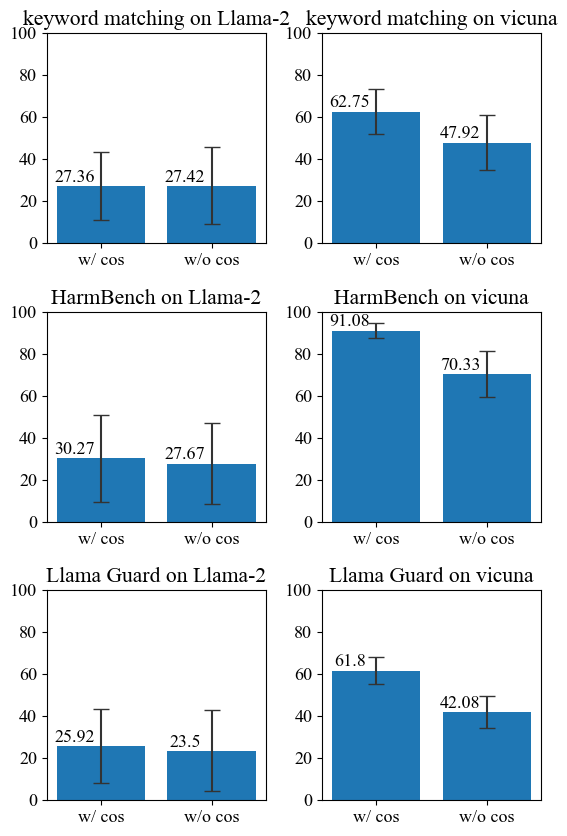

In [38]:

# 设置图的尺寸，每行两个图，总共三行
fig, axes = plt.subplots(3, 2, figsize=(6, 9))


# 设置每个柱状图的数据
for i, ax in enumerate(axes.flat):
    means, stds = data[i]
    print(means,stds)
    bars=ax.bar(np.arange(len(means)), means, yerr=stds,error_kw = {'ecolor' : '0.2', 'capsize' :6 })
    ax.set_title(list(withcos.keys())[i])
    ax.set_xticks(np.arange(len(means)))
    ax.set_xticklabels(['w/ cos', 'w/o cos'])
    ax.set_ylim(0, 100)  # 你可以根据需要调整y轴的范围
    for bar in bars:
        yval = bar.get_height()
        print(yval)
        ax.text(bar.get_x() + bar.get_width()*1/5, yval + 0.1, round(yval, 2),
                ha='center', va='bottom')  # 在柱子顶部显示数值
# 调整布局，使子图不重叠
plt.tight_layout(rect=[0.05, 0.05, 1, 1])  # 调整以给全局标签留出空间
plt.savefig('cosdecay.png')
plt.show()

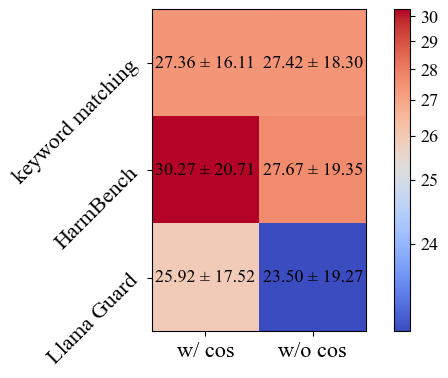

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize, PowerNorm

llamamean=np.array([k[0] for k in data[::2]])
llamastd=np.array([k[1] for k in data[::2]])
# 假设 data_matrix 是一个 3x2 的矩阵，每个元素是一个特征的均值
data_matrix = llamamean

# 假设 std_matrix 是对应标准差的 3x2 矩阵
std_matrix = llamastd

# 创建热力图
fig, ax = plt.subplots(figsize=(6, 4))

# 绘制热力图，只使用均值矩阵来生成颜色
cax = ax.imshow(data_matrix, cmap='coolwarm', norm=PowerNorm(gamma=0.5))

# 添加颜色条
cbar = fig.colorbar(cax, ax=ax)
# cbar.set_label('Llama-2')  # 设置颜色条标签

# 设置 x 轴和 y 轴标签
ax.set_xticks([0, 1])
ax.set_xticklabels(['w/ cos', 'w/o cos'])
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['keyword matching', 'HarmBench', 'Llama Guard'] ,rotation=45)
ax.tick_params(axis='both', labelsize=16)  # 调整横纵坐标刻度数字大小

# 在热力图上添加数据标签，显示为均值±标准差格式
for i in range(data_matrix.shape[0]):
    for j in range(data_matrix.shape[1]):
        mean = data_matrix[i, j]
        std = std_matrix[i, j]
        ax.text(j, i, f'{mean:.2f} ± {std:.2f}', ha='center', va='center', color='black')

# 调整布局并显示
plt.tight_layout()
plt.savefig('llama2cos.png',dpi=300)
plt.show()


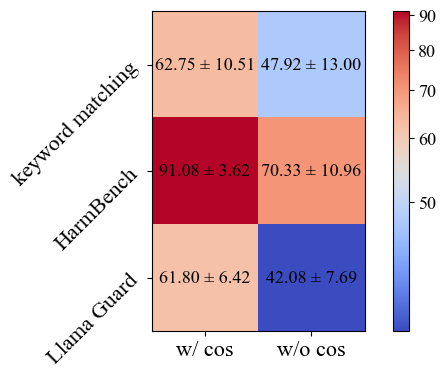

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize, PowerNorm
vicunamean=np.array([k[0] for k in data[1::2]])
vicunastd=np.array([k[1] for k in data[1::2]])
# 假设 data_matrix 是一个 3x2 的矩阵，每个元素是一个特征的均值
data_matrix = vicunamean

# 假设 std_matrix 是对应标准差的 3x2 矩阵
std_matrix = vicunastd

# 创建热力图
fig, ax = plt.subplots(figsize=(6, 4))

# 绘制热力图，只使用均值矩阵来生成颜色
cax = ax.imshow(data_matrix, cmap='coolwarm', norm=PowerNorm(gamma=0.5))

# 添加颜色条
cbar = fig.colorbar(cax, ax=ax)
# cbar.set_label('vicuna')  # 设置颜色条标签

# 设置 x 轴和 y 轴标签
ax.set_xticks([0, 1])
ax.set_xticklabels(['w/ cos', 'w/o cos'])
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(['keyword matching', 'HarmBench', 'Llama Guard'], rotation=45)
ax.tick_params(axis='both', labelsize=16)  # 调整横纵坐标刻度数字大小
# 在热力图上添加数据标签，显示为均值±标准差格式
for i in range(data_matrix.shape[0]):
    for j in range(data_matrix.shape[1]):
        mean = data_matrix[i, j]
        std = std_matrix[i, j]
        ax.text(j, i, f'{mean:.2f} ± {std:.2f}', ha='center', va='center', color='black')

# 调整布局并显示
plt.tight_layout()
plt.savefig('vicunacos.png',dpi=300)
plt.show()
